In [142]:
import requests
import bs4
from bs4 import BeautifulSoup
from datetime import datetime
import plotly.express as px
import pandas as pd
print(requests.__version__)    # ----- 버전확인
print(bs4.__version__)
datetime.now() # ----- 현재 시간 출력

2.28.1
4.11.1


datetime.datetime(2023, 2, 15, 13, 24, 9, 652794)

In [143]:
html = requests.get('http://www.javavc.pe.kr')
html

<Response [200]>

In [144]:
print(html.headers)
print(html.encoding)

{'Date': 'Wed, 15 Feb 2023 04:24:10 GMT', 'Server': 'Apache', 'X-Powered-By': 'PHP/7.2.34', 'Connection': 'close', 'Transfer-Encoding': 'chunked', 'Content-Type': 'text/html'}
ISO-8859-1


In [145]:
print(html.text) # ------- 인코딩 문제로 문자 깨져서 나온다.

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="ie=edge">
  <title>Document</title>
  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css">
  <style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 70%;
      margin: 3rem auto auto auto;
      text-align: center
    }

    table {
      width: 100%;
    }
  </style>
</head>

<body>
  <h1>Web Crawling Test Site<span id="update">2022.11.09</span></h1>
  <div class="main">
    <h2 id="ê°ëë¤ì ì">ê°ëë¤ ì ì</h2>
    <h3><span style="color: salmon">ì¼ë³</span> ìì¸</h3>
    <table class="table table-hover">
      <tbody>
        <tr>
          <th scope="col">ë ì§</th>
          <th scope="col">ì¢ê°</th>
          <th scope="col">ì ì¼ë¹</th>
          <th scope="col">ìê°</th>
   

In [146]:
response = requests.get('http://www.javavc.pe.kr')
response.encoding = 'utf-8'# ------- 인코딩 변경
html = response.text
soup = BeautifulSoup(html, 'html.parser') # ----- 원하는 문자열로 잘라줌
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<title>Document</title>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" rel="stylesheet"/>
<style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 70%;
      margin: 3rem auto auto auto;
      text-align: center
    }

    table {
      width: 100%;
    }
  </style>
</head>
<body>
<h1>Web Crawling Test Site<span id="update">2022.11.09</span></h1>
<div class="main">
<h2 id="가나다전자">가나다 전자</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.

In [147]:
# url code를 파일로 저장
f = open('test.html', 'w', encoding = 'utf-8')
f.write(html)
f.close()

In [148]:
print(f)

<_io.TextIOWrapper name='test.html' mode='w' encoding='utf-8'>


In [149]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="ie=edge" http-equiv="X-UA-Compatible"/>
<title>Document</title>
<link href="https://stackpath.bootstrapcdn.com/bootstrap/4.4.1/css/bootstrap.min.css" rel="stylesheet"/>
<style>
    h1{
      margin: 2rem;
    }
    h1>span{
      font-size: 1rem;
    }
    .main {
      width: 70%;
      margin: 3rem auto auto auto;
      text-align: center
    }

    table {
      width: 100%;
    }
  </style>
</head>
<body>
<h1>Web Crawling Test Site<span id="update">2022.11.09</span></h1>
<div class="main">
<h2 id="가나다전자">가나다 전자</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.

In [150]:
soup.title

<title>Document</title>

In [151]:
soup.title.get_text()

'Document'

In [152]:
print(soup.find_all('tt')) # ----------- 없는 태그이므로 빈 리스트 출력
print(soup.find_all('tr'))

[]
[<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>, <tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>, <tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                            190
                        </span>
</td>
<td class="num"><span>6,830</span></td>
<td class="num"><sp

In [153]:
print(soup.find_all('th'))

[<th scope="col">날짜</th>, <th scope="col">종가</th>, <th scope="col">전일비</th>, <th scope="col">시가</th>, <th scope="col">고가</th>, <th scope="col">저가</th>, <th scope="col">거래량</th>, <th scope="col">날짜</th>, <th scope="col">종가</th>, <th scope="col">전일비</th>, <th scope="col">시가</th>, <th scope="col">고가</th>, <th scope="col">저가</th>, <th scope="col">거래량</th>, <th scope="col">날짜</th>, <th scope="col">종가</th>, <th scope="col">전일비</th>, <th scope="col">시가</th>, <th scope="col">고가</th>, <th scope="col">저가</th>, <th scope="col">거래량</th>, <th scope="col">날짜</th>, <th scope="col">종가</th>, <th scope="col">전일비</th>, <th scope="col">시가</th>, <th scope="col">고가</th>, <th scope="col">저가</th>, <th scope="col">거래량</th>]


In [154]:
print(soup.find_all('th')[0].get_text())

날짜


In [155]:
soup.select('.main')

[<div class="main">
 <h2 id="가나다전자">가나다 전자</h2>
 <h3><span style="color: salmon">일별</span> 시세</h3>
 <table class="table table-hover">
 <tbody>
 <tr>
 <th scope="col">날짜</th>
 <th scope="col">종가</th>
 <th scope="col">전일비</th>
 <th scope="col">시가</th>
 <th scope="col">고가</th>
 <th scope="col">저가</th>
 <th scope="col">거래량</th>
 </tr>
 <tr>
 <td align="center "><span class="date">2019.10.23</span></td>
 <td class="num"><span>6,650</span></td>
 <td class="num">
 <img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                             20
                         </span>
 </td>
 <td class="num"><span>6,590</span></td>
 <td class="num"><span>6,830</span></td>
 <td class="num"><span>6,580</span></td>
 <td class="num"><span>398,421</span></td>
 </tr>
 <tr>
 <td align="center"><span class="date">2019.10.22</span></td>
 <td class="num"><span>6,630</span></td>
 <td class="num">
 <img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" widt

In [156]:
onestep=soup.select('.main')[0]
print(onestep.select('tbody > tr'))

[<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>, <tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>, <tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                            190
                        </span>
</td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>

In [157]:
twostep=(onestep.select('tbody > tr')[1:])
print(twostep)

[<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>, <tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
                            190
                        </span>
</td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,930</span></td>
<td class="num"><span>6,530</span></td>
<td class="num"><span>919,571</span></td>
</tr>, <tr>
<td align="center"><span class="date">2019.10.21</span></td>
<td class

In [158]:
twostep[1].select('td')[1].text

'6,630'

In [159]:
date = []
price = []
for i in twostep:
    date.append(i.select('td')[0].text)
    price.append(int(i.select('td')[1].text.replace(',','')))
print(price)

[6650, 6630, 6820, 6430, 5950, 5930, 5640, 5380, 5040, 5100, 5050, 4940, 5010, 4920, 5010, 5000, 5010, 5060, 5060, 5330]


In [160]:
import plotly.express as px
import pandas as pd

In [161]:
fig = px.line(x=date, y=price, title='주식정보')
fig.show()

In [162]:
dFrame=pd.DataFrame({'날짜':date,'종가':price});
dFrame
fig=px.line(dFrame, x='날짜', y='종가', title='가나다 전자 주식정보')
fig.show()

In [163]:
gday = soup.select('.main')
print(gday)

[<div class="main">
<h2 id="가나다전자">가나다 전자</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv0

In [164]:
오늘종가=[]
오늘시가총액=[]
for i in gday:
    print(i.select('.table > tbody > tr')[1].select('td')[1].text.replace(',',''))

6650
31300
13250
2600


In [165]:
# gday[0].select('.table > tbody > tr')[1].select('td')[1].select('span').text.replace(',','')
# [0]없으면 리플레이스부터 에러난다.

gday[0].select('.table > tbody > tr')[1].select('td')[1].select('span')[0].text.replace(',','')

'6650'

In [166]:
오늘종가=[]
오늘시가총액=[]
for i in gday:
    오늘종가.append(int(i.select('.table > tbody > tr')[1].select('td')[1].select('span')[0].text.replace(',','')))
print(오늘종가)

[6650, 31300, 13250, 2600]


In [167]:
오늘시가총액 = [i * 10000 for i in 오늘종가]
전그룹사시가총액 = format(sum(오늘시가총액))

In [168]:
print(오늘시가총액)
print(전그룹사시가총액)

[66500000, 313000000, 132500000, 26000000]
538000000


In [169]:
그룹사별일일시가 = soup.select('.main')
for j in range(1, len(soup.select('.main')[0].select('table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        print(i)

<div class="main">
<h2 id="가나다전자">가나다 전자</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01

<div class="main">
<h2 id="가나다마트">가나다마트</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>2,600</span></td>
<td class="num">
<img height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            600
                        </span>
</td>
<td class="num"><span>2,055</span></td>
<td class="num"><span>2,600</span></td>
<td class="num"><span>2,020</span></td>
<td class="num"><span>2,203,110</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>2,000</span></td>
<td class="num">
<img alt="상승" height="6" src="ico_up.gif" style="margin-right:4px;" width="7"/><span>
                            

In [178]:
그룹사별일일시가 = soup.select('.main')
오늘시가총액=[]
for j in range(1, len(soup.select('.main')[0].select('table > tbody > tr'))):
    오늘종가 = []
    for i in 그룹사별일일시가:
        오늘종가.append(int(i.select('.table > tbody > tr')[j].select('td')[1].select('span')[0].text.replace(',','')))
    #print(오늘종가)
    오늘시가총액.append(sum(오늘종가))
print(오늘시가총액)

[53800, 53180, 53615, 52305, 49035, 48755, 46970, 46140, 45900, 45765, 44000, 43210, 43830, 44310, 44850, 44370, 43935, 44180, 44410, 46245]


In [174]:
#날짜
날짜전체=soup.select('.main')[0].select('.table > tbody > tr > td > .date')
data=[]
for i in 날짜전체:
    data.append(i.text)
data

['2019.10.23',
 '2019.10.22',
 '2019.10.21',
 '2019.10.18',
 '2019.10.17',
 '2019.10.16',
 '2019.10.15',
 '2019.10.14',
 '2019.10.11',
 '2019.10.10',
 '2019.10.08',
 '2019.10.07',
 '2019.10.04',
 '2019.10.02',
 '2019.10.01',
 '2019.09.30',
 '2019.09.27',
 '2019.09.26',
 '2019.09.25',
 '2019.09.24']

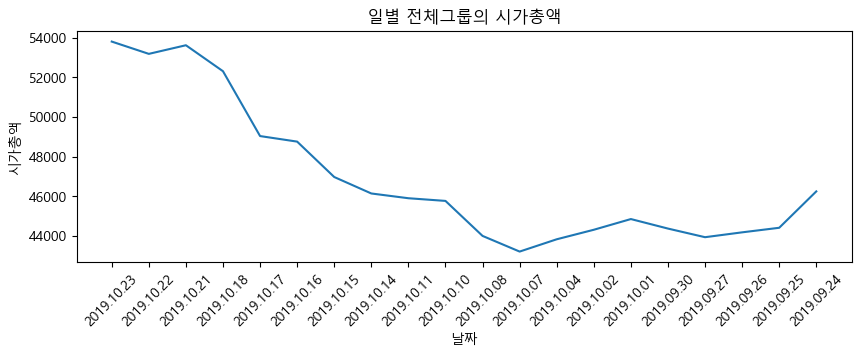

In [176]:
import matplotlib.pyplot as plt
plt.plot(data, 오늘시가총액)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams["figure.figsize"] = (10,3)
plt.xticks(rotation = 45) 
plt.title('일별 전체그룹의 시가총액')
plt.xlabel('날짜');
plt.ylabel('시가총액');
plt.show()

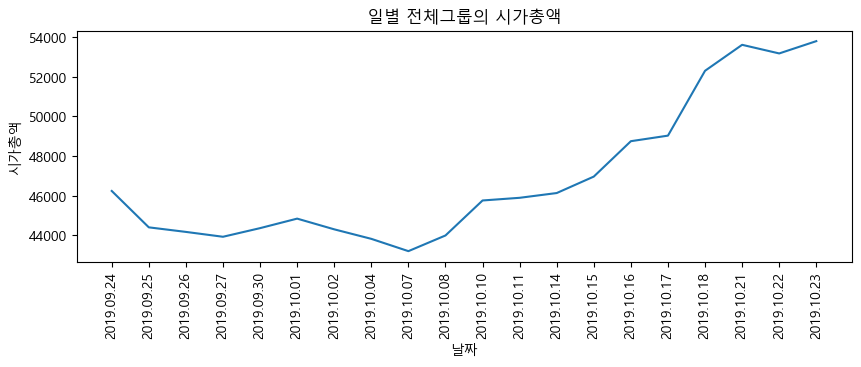

In [177]:
# 날짜순을 정렬하여 재출력 
import matplotlib.pyplot as plt

plt.plot(date[::-1], 오늘시가총액[::-1]) 
plt.title('일별 전체그룹의 시가총액')
plt.xlabel('날짜');
plt.ylabel('시가총액');
plt.xticks(rotation = 90 )
plt.show()

In [181]:
그룹사별일일데이터 = soup.select('.main')
그룹사별일일거래량 = [[],[],[],[]]
그룹사전체일일거래량 = []

In [182]:
그룹사별일일데이터[0]

<div class="main">
<h2 id="가나다전자">가나다 전자</h2>
<h3><span style="color: salmon">일별</span> 시세</h3>
<table class="table table-hover">
<tbody>
<tr>
<th scope="col">날짜</th>
<th scope="col">종가</th>
<th scope="col">전일비</th>
<th scope="col">시가</th>
<th scope="col">고가</th>
<th scope="col">저가</th>
<th scope="col">거래량</th>
</tr>
<tr>
<td align="center "><span class="date">2019.10.23</span></td>
<td class="num"><span>6,650</span></td>
<td class="num">
<img alt="상승 " height="6 " src="ico_up.gif " style="margin-right:4px; " width="7 "/><span>
                            20
                        </span>
</td>
<td class="num"><span>6,590</span></td>
<td class="num"><span>6,830</span></td>
<td class="num"><span>6,580</span></td>
<td class="num"><span>398,421</span></td>
</tr>
<tr>
<td align="center"><span class="date">2019.10.22</span></td>
<td class="num"><span>6,630</span></td>
<td class="num">
<img alt="하락" height="6" src="ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01

In [192]:
그룹사별일일데이터[0].select('.table > tbody > tr')[1].select('td')[-1].text.replace(',','') # 가나다전자 일일거래량

'398421'

In [210]:
그룹사별일일거래량 = [[],[],[],[]]
for j in range(1, len(soup.select('.main')[0].select('table > tbody > tr'))):
    for i in range(0, 4):
        그룹사별일일거래량[i].append(int(그룹사별일일데이터[i].select('.table > tbody > tr')[j].select('td')[-1].text.replace(',','')))

In [209]:
그룹사별일일거래량

[[398421,
  919571,
  1678055,
  2168857,
  1982922,
  839434,
  702104,
  764800,
  134558,
  288563,
  223839,
  199580,
  188467,
  160510,
  246145,
  705046,
  408859,
  404633,
  441923,
  211019,
  398421,
  919571,
  1678055,
  2168857,
  1982922,
  839434,
  702104,
  764800,
  134558,
  288563,
  223839,
  199580,
  188467,
  160510,
  246145,
  705046,
  408859,
  404633,
  441923,
  211019,
  398421,
  919571,
  1678055,
  2168857,
  1982922,
  839434,
  702104,
  764800,
  134558,
  288563,
  223839,
  199580,
  188467,
  160510,
  246145,
  705046,
  408859,
  404633,
  441923,
  211019,
  398421,
  919571,
  1678055,
  2168857,
  1982922,
  839434,
  702104,
  764800,
  134558,
  288563,
  223839,
  199580,
  188467,
  160510,
  246145,
  705046,
  408859,
  404633,
  441923,
  211019,
  398421,
  919571,
  1678055,
  2168857,
  1982922,
  839434,
  702104,
  764800,
  134558,
  288563,
  223839,
  199580,
  188467,
  160510,
  246145,
  705046,
  408859,
  404633,
  441

In [211]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'

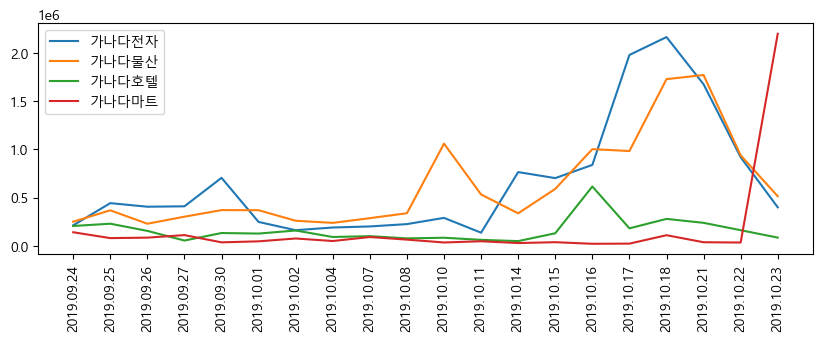

In [219]:
plt.plot(data[::-1], 그룹사별일일거래량[0][::-1], label = '가나다전자')
plt.plot(data[::-1], 그룹사별일일거래량[1][::-1], label = '가나다물산')
plt.plot(data[::-1], 그룹사별일일거래량[2][::-1], label = '가나다호텔')
plt.plot(data[::-1], 그룹사별일일거래량[3][::-1], label = '가나다마트')
plt.xticks(rotation = 90 )
plt.legend(loc=2)
plt.rcParams["figure.figsize"] = (15,4)   #figsize(가로길이,세로길이)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True
plt.show()

In [221]:
for i in range(len(그룹사별일일거래량[0])):
    s = 0
    for j in range(4):
        s += 그룹사별일일거래량[j][i]
    그룹사전체일일거래량.append(s)
그룹사전체일일거래량

[3198301,
 2051067,
 3724291,
 4286651,
 3167249,
 2477184,
 1456343,
 1174487,
 771938,
 1463947,
 698527,
 673095,
 562816,
 650582,
 784490,
 1239662,
 872050,
 868624,
 1115164,
 803201]

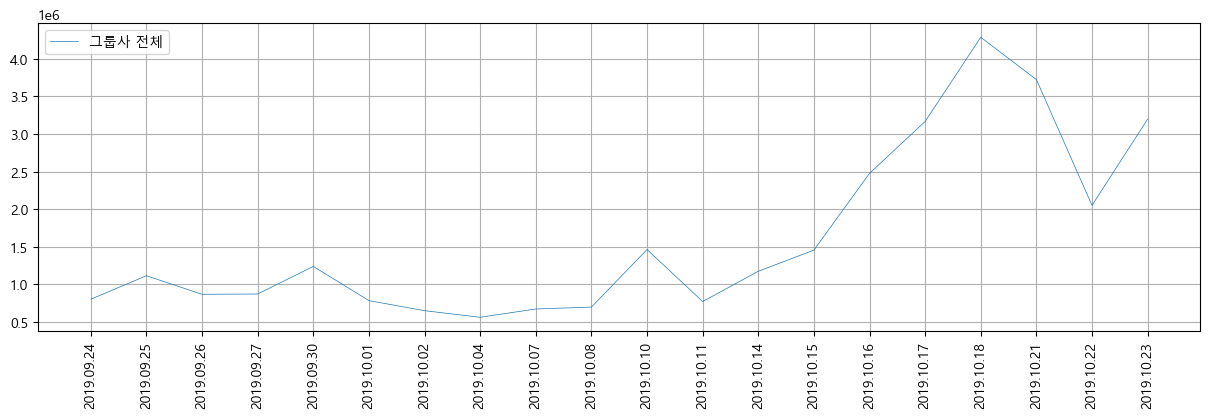

In [222]:
import matplotlib.pyplot as plt

plt.plot(data[::-1], 그룹사전체일일거래량[::-1], label='그룹사 전체')
plt.xticks(rotation = 90 )
plt.legend(loc=2)
plt.rcParams["figure.figsize"] = (10,3)   #figsize(가로길이,세로길이)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False
plt.show()

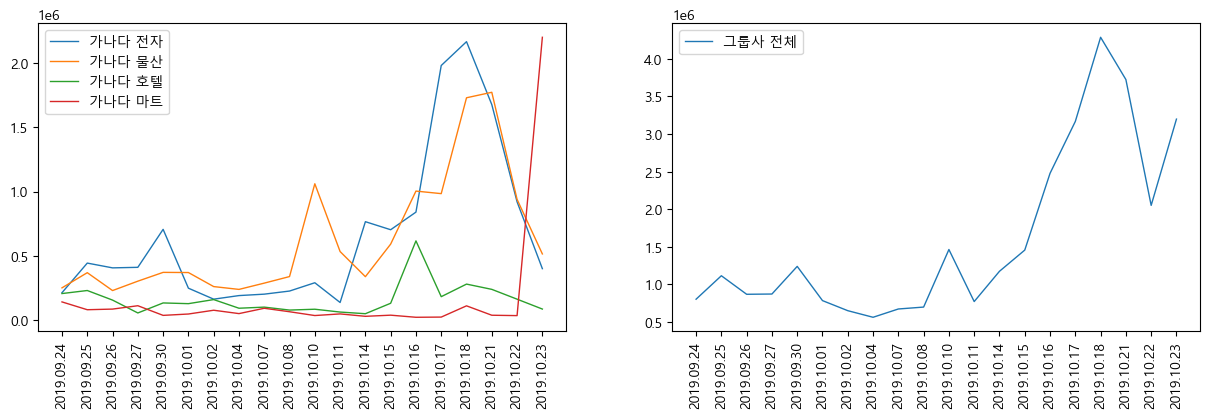

In [224]:
f = plt.figure(figsize=(15,4))
ax = f.add_subplot(121)  
ax.plot(data[::-1], 그룹사별일일거래량[0][::-1], label='가나다 전자')
ax.plot(data[::-1], 그룹사별일일거래량[1][::-1], label='가나다 물산')
ax.plot(data[::-1], 그룹사별일일거래량[2][::-1], label='가나다 호텔')
ax.plot(data[::-1], 그룹사별일일거래량[3][::-1], label='가나다 마트')
plt.xticks(rotation = 90)
ax.legend(loc=2)
ax2 = f.add_subplot(122)
ax2.figsize=(15,15)
ax2.plot(date[::-1], 그룹사전체일일거래량[::-1], label='그룹사 전체')
plt.xticks(rotation = 90)
ax2.legend(loc=2)


In [225]:
print(그룹사전체일일거래량[::-1])# reverse
print(그룹사전체일일거래량[19:0:-1])


[803201, 1115164, 868624, 872050, 1239662, 784490, 650582, 562816, 673095, 698527, 1463947, 771938, 1174487, 1456343, 2477184, 3167249, 4286651, 3724291, 2051067, 3198301]
[803201, 1115164, 868624, 872050, 1239662, 784490, 650582, 562816, 673095, 698527, 1463947, 771938, 1174487, 1456343, 2477184, 3167249, 4286651, 3724291, 2051067]


In [226]:
그룹사별일일거래량[0][::-1]

[211019,
 441923,
 404633,
 408859,
 705046,
 246145,
 160510,
 188467,
 199580,
 223839,
 288563,
 134558,
 764800,
 702104,
 839434,
 1982922,
 2168857,
 1678055,
 919571,
 398421]